<a href="https://colab.research.google.com/github/Carlos09Or/Wafer/blob/main/wafersFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Si ya conoces Colab, mira este video para aprender sobre las tablas interactivas, la vista histórica de código ejecutado y la paleta de comandos.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  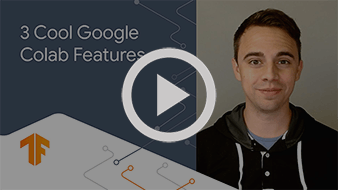
  </a>
</center>

In [ ]:
COMIENZO DEL PROYECTO

In [ ]:
# --- PARTE 1: Preparación del Entorno y Carga de Datos ---

# Celda 1: Instalación de Librerías (ejecutar solo una vez por sesión)
!pip install gdown albumentations scikit-learn seaborn

In [ ]:
# Celda 2: Imports
import os
import pickle
import torch
import torchvision
import torchvision.transforms as transforms
import albumentations as A
from albumentations.pytorch import ToTensorV2
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import cv2  # Para manipulación de imágenes
import gdown
from sklearn.model_selection import train_test_split

In [ ]:
# Celda 3: Descarga del Dataset (condicional)
file_path = "LSWMD.pkl"
file_id = "1JGJ_a7c5Cs4cAGh7NGElfGfhIm90-WUj"
url = f"https://drive.google.com/uc?id={file_id}"

if not os.path.exists(file_path):
    print("Downloading dataset...")
    gdown.download(url, file_path, quiet=False)
print("Dataset found!")

Downloading...
From (original): https://drive.google.com/uc?id=1JGJ_a7c5Cs4cAGh7NGElfGfhIm90-WUj
From (redirected): https://drive.google.com/uc?id=1JGJ_a7c5Cs4cAGh7NGElfGfhIm90-WUj&confirm=t&uuid=18087ea5-b383-40f6-a47f-54697e2cf41c
To: /content/LSWMD.pkl
100%|██████████| 2.10G/2.10G [00:24<00:00, 84.2MB/s]

Dataset found!


In [ ]:
import pandas as pd

# Ruta del archivo .pkl
file_path = "LSWMD.pkl"

# Cargar el archivo .pkl
try:
    df = pd.read_pickle(file_path)
    print("Archivo cargado correctamente.")
except Exception as e:
    print("Error al cargar el archivo:", e)


Archivo cargado correctamente.


In [ ]:
# Verificar la información del DataFrame
df.info()

# Mostrar las primeras filas del DataFrame
print(df.head())

# Verificar las columnas del DataFrame
print("Columnas del DataFrame:", df.columns)

# Verificar estadísticas descriptivas
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB
                                            waferMap  dieSize lotName  \
0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0    lot1   
1  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0    lot1   
2  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0    lot1   
3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0    lot1   
4  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0    lot1   

   waferIndex trianTestLabel f

In [ ]:
df.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]


In [ ]:
df.tail()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,[[Test]],[[Edge-Ring]]
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,[[Test]],[[Edge-Loc]]
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,[[Test]],[[Edge-Ring]]
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,[],[]
811456,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47543,2.0,[],[]


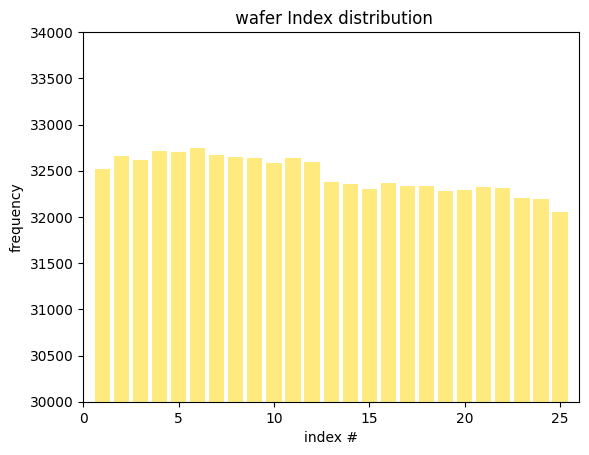

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


uni_Index=np.unique(df.waferIndex, return_counts=True)
plt.bar(uni_Index[0],uni_Index[1], color='gold', align='center', alpha=0.5)
plt.title(" wafer Index distribution")
plt.xlabel("index #")
plt.ylabel("frequency")
plt.xlim(0,26)
plt.ylim(30000,34000)
plt.show()

In [ ]:
df = df.drop(['waferIndex'], axis = 1)

In [ ]:
def find_dim(x):
    dim0=np.size(x,axis=0)
    dim1=np.size(x,axis=1)
    return dim0,dim1
df['waferMapDim']=df.waferMap.apply(find_dim)
df.sample(5)

,waferMap,dieSize,lotName,trianTestLabel,failureType,waferMapDim
307826,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",773.0,lot18759,[],[],"(29, 35)"
739728,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1507.0,lot44631,[[Test]],[[none]],"(43, 44)"
445756,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,...",712.0,lot27345,[],[],"(32, 29)"
74148,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1565.0,lot5525,[],[],"(45, 45)"
797637,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",562.0,lot46979,[[Test]],[[none]],"(29, 26)"


In [ ]:
sub_df = df.loc[df['waferMapDim'] == (26, 26)]
sub_wafer = sub_df['waferMap'].values

sw = np.ones((1, 26, 26))
label = list()

for i in range(len(sub_df)):
    # skip null label
    if len(sub_df.iloc[i,:]['failureType']) == 0:
        continue
    sw = np.concatenate((sw, sub_df.iloc[i,:]['waferMap'].reshape(1, 26, 26)))
    label.append(sub_df.iloc[i,:]['failureType'][0][0])

In [ ]:
x = sw[1:]
y = np.array(label).reshape((-1,1))

In [ ]:
print('x shape : {}, y shape : {}'.format(x.shape, y.shape))

x shape : (14366, 26, 26), y shape : (14366, 1)


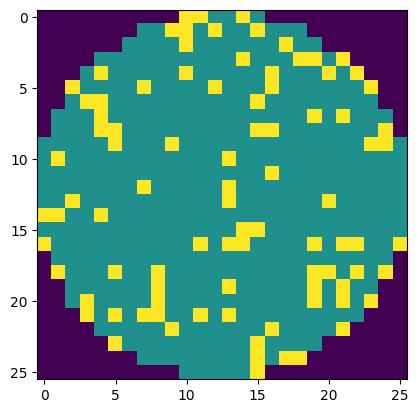

Faulty case : ['none'] 


In [ ]:
# plot 1st data
plt.imshow(x[0])
plt.show()

# check faulty case
print('Faulty case : {} '.format(y[0]))

In [ ]:
#add channel
x = x.reshape((-1, 26, 26, 1))

In [ ]:
faulty_case = np.unique(y)
print('Faulty case list : {}'.format(faulty_case))

Faulty case list : ['Center' 'Donut' 'Edge-Loc' 'Edge-Ring' 'Loc' 'Near-full' 'Random'
 'Scratch' 'none']


In [ ]:
for f in faulty_case :
    print('{} : {}'.format(f, len(y[y==f])))

Center : 90
Donut : 1
Edge-Loc : 296
Edge-Ring : 31
Loc : 297
Near-full : 16
Random : 74
Scratch : 72
none : 13489


In [ ]:
# One-hot-Encoding faulty categorical variable as channel
new_x = np.zeros((len(x), 26, 26, 3))

for w in range(len(x)):
    for i in range(26):
        for j in range(26):
            new_x[w, i, j, int(x[w, i, j])] = 1

<ipython-input-18-4810b3bb25dd>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_x[w, i, j, int(x[w, i, j])] = 1


In [ ]:
#check new x dimension
new_x.shape

(14366, 26, 26, 3)

In [ ]:
# parameter
epoch=15
batch_size=1024

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras import Input

# Encoder
input_shape = (26, 26, 3)
input_tensor = Input(input_shape)
encode = layers.Conv2D(64, (3,3), padding='same', activation='relu')(input_tensor)

latent_vector = layers.MaxPool2D()(encode)

# Decoder
decode_layer_1 = layers.Conv2DTranspose(64, (3,3), padding='same', activation='relu')
decode_layer_2 = layers.UpSampling2D()
output_tensor = layers.Conv2DTranspose(3, (3,3), padding='same', activation='sigmoid')

# connect decoder layers
decode = decode_layer_1(latent_vector)
decode = decode_layer_2(decode)

ae = models.Model(input_tensor, output_tensor(decode))
ae.compile(optimizer = 'Adam',
              loss = 'mse',
             )

In [ ]:
ae.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 26, 26, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 26, 26, 3)           │           1,731 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,451 (158.01 KB)

 Trainable params: 40,451 (158.01 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# start train
ae.fit(new_x, new_x,
       batch_size=batch_size,
       epochs=epoch,
       verbose=2)

Epoch 1/15
15/15 - 6s - 429ms/step - loss: 0.1622
Epoch 2/15
15/15 - 1s - 35ms/step - loss: 0.0950
Epoch 3/15
15/15 - 1s - 41ms/step - loss: 0.0855
Epoch 4/15
15/15 - 1s - 41ms/step - loss: 0.0738
Epoch 5/15
15/15 - 1s - 41ms/step - loss: 0.0642
Epoch 6/15
15/15 - 1s - 35ms/step - loss: 0.0572
Epoch 7/15
15/15 - 1s - 34ms/step - loss: 0.0522
Epoch 8/15
15/15 - 1s - 44ms/step - loss: 0.0478
Epoch 9/15
15/15 - 1s - 36ms/step - loss: 0.0433
Epoch 10/15
15/15 - 1s - 37ms/step - loss: 0.0388
Epoch 11/15
15/15 - 1s - 35ms/step - loss: 0.0346
Epoch 12/15
15/15 - 1s - 41ms/step - loss: 0.0309
Epoch 13/15
15/15 - 1s - 41ms/step - loss: 0.0277
Epoch 14/15
15/15 - 1s - 42ms/step - loss: 0.0251
Epoch 15/15
15/15 - 1s - 34ms/step - loss: 0.0230


In [ ]:
# Make encoder model with part of autoencoder model layers
encoder = models.Model(input_tensor, latent_vector)

In [ ]:
# Make decoder model with part of autoencoder model layers
decoder_input = Input((13, 13, 64))
decode = decode_layer_1(decoder_input)
decode = decode_layer_2(decode)
decoder = models.Model(decoder_input, output_tensor(decode))

In [ ]:
# Encode original faulty wafer
encoded_x = encoder.predict(new_x)

449/449 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [ ]:
# Add noise to encoded latent faulty wafers vector.
noised_encoded_x = encoded_x + np.random.normal(loc=0, scale=0.1, size = (len(encoded_x), 13, 13, 64))

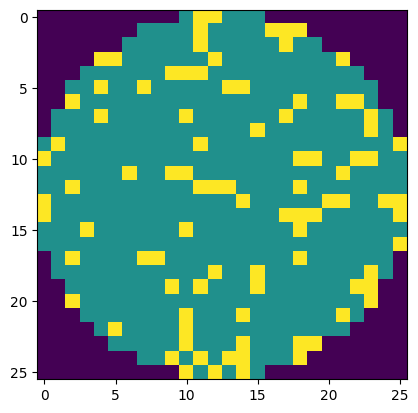

In [ ]:
# check original faulty wafer data
plt.imshow(np.argmax(new_x[3], axis=2))

449/449 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


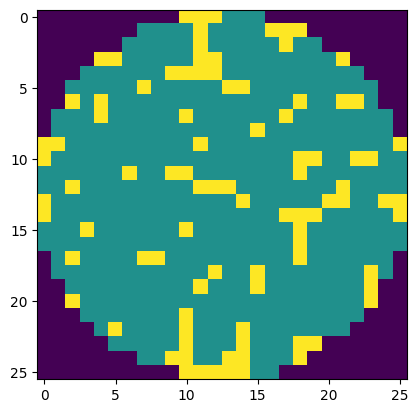

In [ ]:
# check new noised faulty wafer data
noised_gen_x = np.argmax(decoder.predict(noised_encoded_x), axis=3)
plt.imshow(noised_gen_x[3])

449/449 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


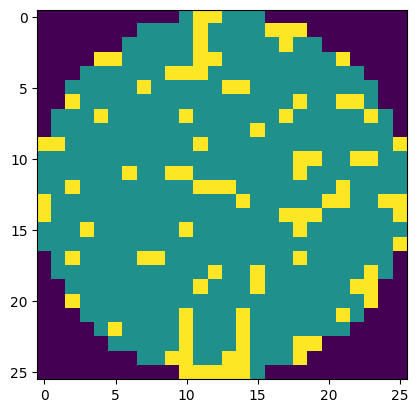

In [ ]:
# check reconstructed original faulty wafer data
gen_x = np.argmax(ae.predict(new_x), axis=3)
plt.imshow(gen_x[3])

In [ ]:
# augment function define
def gen_data(wafer, label):
    # Encode input wafer
    encoded_x = encoder.predict(wafer)

    # dummy array for collecting noised wafer
    gen_x = np.zeros((1, 26, 26, 3))

    # Make wafer until total # of wafer to 2000
    for i in range((2000//len(wafer)) + 1):
        noised_encoded_x = encoded_x + np.random.normal(loc=0, scale=0.1, size = (len(encoded_x), 13, 13, 64))
        noised_gen_x = decoder.predict(noised_encoded_x)
        gen_x = np.concatenate((gen_x, noised_gen_x), axis=0)
    # also make label vector with same length
    gen_y = np.full((len(gen_x), 1), label)

    # return date without 1st dummy data.
    return gen_x[1:], gen_y[1:]

In [ ]:
# Augmentation for all faulty case.
for f in faulty_case :
    # skip none case
    if f == 'none' :
        continue

    gen_x, gen_y = gen_data(new_x[np.where(y==f)[0]], f)
    new_x = np.concatenate((new_x, gen_x), axis=0)
    y = np.concatenate((y, gen_y))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━

In [ ]:
print('After Generate new_x shape : {}, new_y shape : {}'.format(new_x.shape, y.shape))

After Generate new_x shape : (30707, 26, 26, 3), new_y shape : (30707, 1)


In [ ]:
for f in faulty_case :
    print('{} : {}'.format(f, len(y[y==f])))

Center : 2160
Donut : 2002
Edge-Loc : 2368
Edge-Ring : 2046
Loc : 2376
Near-full : 2032
Random : 2146
Scratch : 2088
none : 13489


In [ ]:
# choice index without replace.
none_idx = np.where(y=='none')[0][np.random.choice(len(np.where(y=='none')[0]), size=11000, replace=False)]

In [ ]:
# delete choiced index data.
new_x = np.delete(new_x, none_idx, axis=0)
new_y = np.delete(y, none_idx, axis=0)


In [ ]:
print('After Delete "none" class new_x shape : {}, new_y shape : {}'.format(new_x.shape, new_y.shape))

After Delete "none" class new_x shape : (19707, 26, 26, 3), new_y shape : (19707, 1)


In [ ]:
for f in faulty_case :
    print('{} : {}'.format(f, len(new_y[new_y==f])))

Center : 2160
Donut : 2002
Edge-Loc : 2368
Edge-Ring : 2046
Loc : 2376
Near-full : 2032
Random : 2146
Scratch : 2088
none : 2489


In [ ]:
from tensorflow.keras.utils import to_categorical

# make string label data to numerical data
for i, l in enumerate(faulty_case):
    new_y[new_y==l] = i

# one-hot-encoding
new_y = to_categorical(new_y)

In [ ]:
# split data train, test
x_train, x_test, y_train, y_test = train_test_split(new_x, new_y,
                                                    test_size=0.33,
                                                    random_state=2019)

In [ ]:
print('Train x : {}, y : {}'.format(x_train.shape, y_train.shape))
print('Test x: {}, y : {}'.format(x_test.shape, y_test.shape))

Train x : (13203, 26, 26, 3), y : (13203, 9)
Test x: (6504, 26, 26, 3), y : (6504, 9)


In [ ]:
print('y_train: ', y_train[:10])  # Verifica las primeras 10 etiquetas
print('y_test: ', y_test[:10])  # Verifica las primeras 10 etiquetas

y_train:  [[0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]]
y_test:  [[0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
from tensorflow.keras import layers, models

# Definir el modelo
model = models.Sequential()

# Capa convolucional (Ejemplo de una arquitectura CNN)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(26, 26, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Aplanar y pasar por una capa densa
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

# Capa de salida para clasificación multi-clase (9 clases)
model.add(layers.Dense(9, activation='softmax'))

# Compilación del modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo para verificar las capas
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,833 (366.54 KB)

 Trainable params: 93,833 (366.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.5669 - loss: 1.1334 - val_accuracy: 0.8181 - val_loss: 0.4727
Epoch 2/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8626 - loss: 0.3749 - val_accuracy: 0.9122 - val_loss: 0.2385
Epoch 3/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9203 - loss: 0.2398 - val_accuracy: 0.9434 - val_loss: 0.1662
Epoch 4/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9451 - loss: 0.1563 - val_accuracy: 0.9488 - val_loss: 0.1469
Epoch 5/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9657 - loss: 0.1011 - val_accuracy: 0.9756 - val_loss: 0.0777
Epoch 6/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9834 - loss: 0.0595 - val_accuracy: 0.9857 - val_loss: 0.0484
Epoch 7/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9877 - loss: 0.0427 - val_accuracy: 0.9779 - val_loss: 0.0641
Epoch 8/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9898 - loss: 0.0375 - val_accuracy: 0

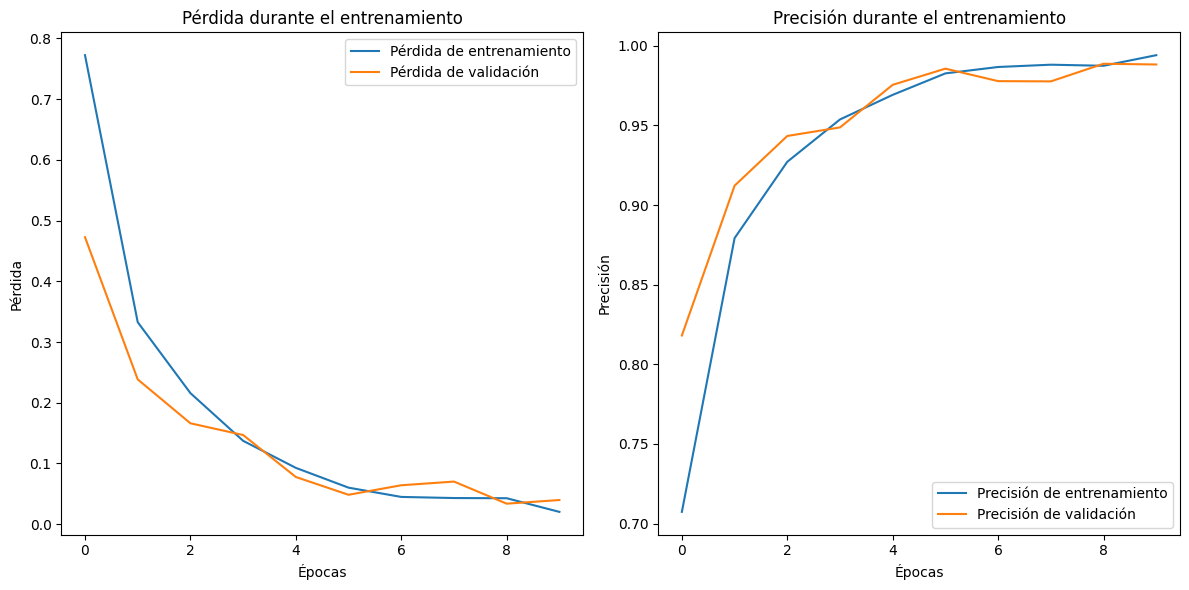

In [ ]:
import matplotlib.pyplot as plt

# Graficar la pérdida de entrenamiento y validación
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Graficar la precisión de entrenamiento y validación
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Evaluar el modelo en los datos de prueba
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9851 - loss: 0.0461
Test accuracy: 0.9883148670196533


Shape de x_test después de la división: (6504, 26, 26, 3)
Train x : (13203, 26, 26, 3), y : (13203, 9)
Test x: (6504, 26, 26, 3), y : (6504, 9)
y_train:  [[0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]]
y_test:  [[0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Shape de x_test antes de la predicción: (6504, 26, 26, 3)
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


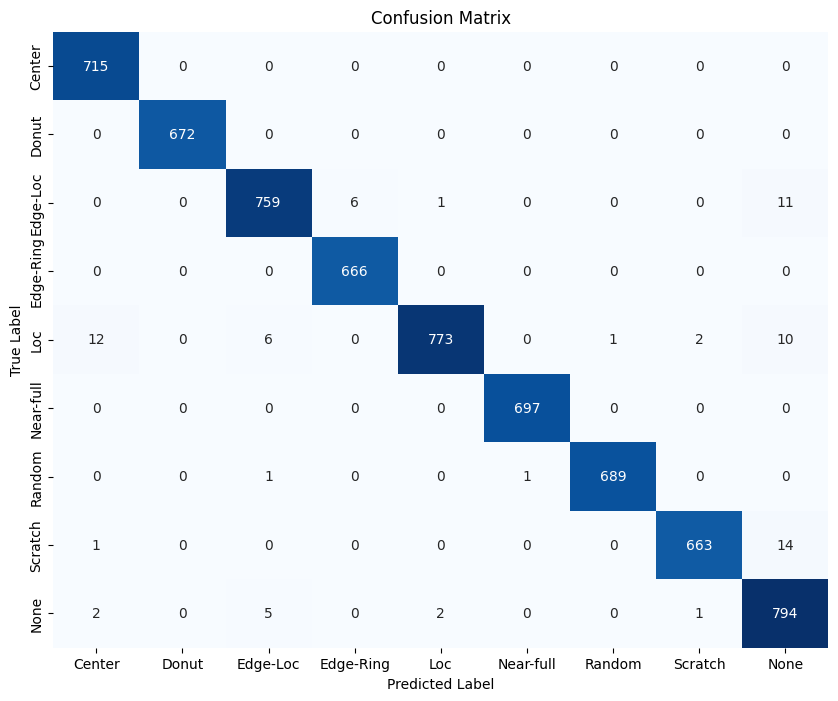

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  # Import train_test_split

# --- Separación de datos ---
x_train, x_test, y_train, y_test = train_test_split(new_x, new_y,
                                                    test_size=0.33,
                                                    random_state=2019)

print(f"Shape de x_test después de la división: {x_test.shape}")  # Depuración
print('Train x : {}, y : {}'.format(x_train.shape, y_train.shape))
print('Test x: {}, y : {}'.format(x_test.shape, y_test.shape))
print('y_train: ', y_train[:10])
print('y_test: ', y_test[:10])

# --- Predicción del modelo ---
print(f"Shape de x_test antes de la predicción: {x_test.shape}")  # Depuración

y_pred = np.argmax(model.predict(x_test), axis=1)  # Predicciones en formato de etiquetas
y_test_labels = np.argmax(y_test, axis=1)  # Convertir y_test de one-hot encoding a etiquetas

# --- Matriz de confusión ---
cm = confusion_matrix(y_test_labels, y_pred)

# --- Visualización de la matriz de confusión ---
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Center', 'Donut', 'Edge-Loc', 'Edge-Ring', 'Loc', 'Near-full', 'Random', 'Scratch', 'None'],
            yticklabels=['Center', 'Donut', 'Edge-Loc', 'Edge-Ring', 'Loc', 'Near-full', 'Random', 'Scratch', 'None'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


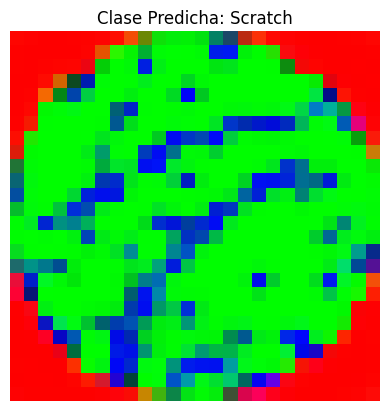

**Resultados de la predicción para la imagen 2000:**
Clase predicha: Scratch
Probabilidades por clase:
Center: 0.0000
Donut: 0.0000
Edge-Loc: 0.0000
Edge-Ring: 0.0000
Loc: 0.0000
Near-full: 0.0000
Random: 0.0000
Scratch: 1.0000
None: 0.0000

⚠️ La wafer tiene un defecto clasificado como: Scratch


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Definir las etiquetas de las clases en el orden correcto
class_labels = [
    "Center", "Donut", "Edge-Loc", "Edge-Ring", "Loc",
    "Near-full", "Random", "Scratch", "None"
]

# Paso 1: Seleccionar una imagen generada
img_index = 2000  # Puedes cambiar este índice para ver otras imágenes
img = gen_x[img_index]  # Seleccionamos la imagen generada

# Si la imagen está normalizada entre 0 y 1, la reescalamos a 0-255 para visualizarla
img = np.clip(img * 255, 0, 255).astype(np.uint8)

# Paso 2: Hacer la predicción con el modelo
prediction = model.predict(np.expand_dims(img, axis=0))  # Expandimos dimensiones para que tenga el formato correcto

# Paso 3: Obtener la clase con mayor probabilidad
predicted_class_idx = np.argmax(prediction)  # Índice de la clase con mayor probabilidad
predicted_class = class_labels[predicted_class_idx]  # Nombre de la clase predicha

# Paso 4: Obtener las probabilidades de todas las clases
probabilities = prediction[0]  # Extraemos el array de probabilidades

# Paso 5: Mostrar la imagen con la predicción
plt.imshow(img, cmap="gray")
plt.title(f"Clase Predicha: {predicted_class}")
plt.axis('off')  # Ocultar ejes
plt.show()

# Paso 6: Mostrar los detalles de la predicción
print(f"**Resultados de la predicción para la imagen {img_index}:**")
print(f"Clase predicha: {predicted_class}")
print(f"Probabilidades por clase:")

for i, prob in enumerate(probabilities):
    print(f"{class_labels[i]}: {prob:.4f}")

# Opcional: Determinar si es un defecto o no
if predicted_class == "None":
    print("\n✅ La wafer está en buen estado (Sin defectos).")
else:
    print("\n⚠️ La wafer tiene un defecto clasificado como:", predicted_class)


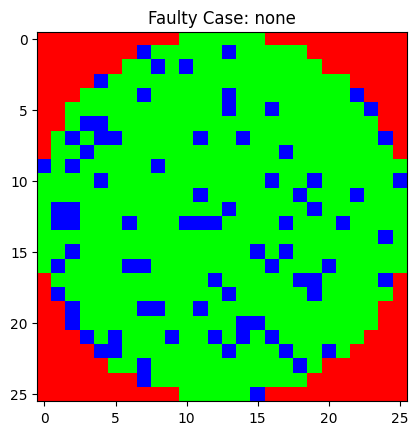

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


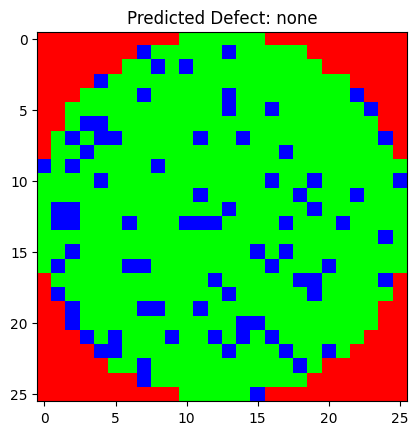

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Lista de clases de defectos
faulty_case = ['Center', 'Donut', 'Edge-Loc', 'Edge-Ring', 'Loc', 'Near-full', 'Random', 'Scratch', 'none']

# Seleccionar una imagen del conjunto de prueba
image_index = 2900  # Selecciona el índice de la imagen en el conjunto de prueba
plt.imshow(x_test[image_index])  # Mostrar la imagen en el índice seleccionado

# Mostrar el tipo de defecto según la etiqueta one-hot
# Si y_test es one-hot encoded, usamos np.argmax para obtener la clase correspondiente
predicted_fault = faulty_case[np.argmax(y_test[image_index])]  # Usamos np.argmax para obtener el índice de la clase activa
plt.title(f"Faulty Case: {predicted_fault}")  # Título con el defecto correspondiente
plt.show()

# Realizar la predicción usando el modelo
image = x_test[image_index]  # Seleccionamos la imagen del conjunto de prueba

# Redimensionar la imagen si es necesario (si tu modelo espera una dimensión extra)
image = image.reshape(1, 26, 26, 3)  # El modelo espera una entrada de 4 dimensiones (n_samples, 26, 26, 3)

# Hacer la predicción usando el modelo entrenado
pred = model.predict(image)

# Obtener la clase con mayor probabilidad
predicted_class = np.argmax(pred, axis=1)

# Mapear la clase a su nombre (utilizando tu lista de clases)
predicted_fault = faulty_case[predicted_class[0]]

# Mostrar la imagen junto con la predicción del defecto
plt.imshow(x_test[image_index])  # Mostrar la imagen original
plt.title(f"Predicted Defect: {predicted_fault}")  # Mostrar el defecto predicho
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 24, 24, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 24, 24, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 10, 10, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 3, 3, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,817 (436.79 KB)

 Trainable params: 111,369 (435.04 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.4141 - loss: 1.9118 - val_accuracy: 0.1261 - val_loss: 2.9086
Epoch 2/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6431 - loss: 0.9131 - val_accuracy: 0.4991 - val_loss: 1.7112
Epoch 3/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7335 - loss: 0.7018 - val_accuracy: 0.7808 - val_loss: 0.5729
Epoch 4/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7882 - loss: 0.5589 - val_accuracy: 0.8386 - val_loss: 0.4600
Epoch 5/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8195 - loss: 0.4782 - val_accuracy: 0.8795 - val_loss: 0.3405
Epoch 6/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8545 - loss: 0.4116 - val_accuracy: 0.9039 - val_loss: 0.2656
Epoch 7/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8740 - loss: 0.3652 - val_accuracy: 0.9237 - val_loss: 0.2272
Epoch 8/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8908 - loss: 0.3103 - val_accuracy: 

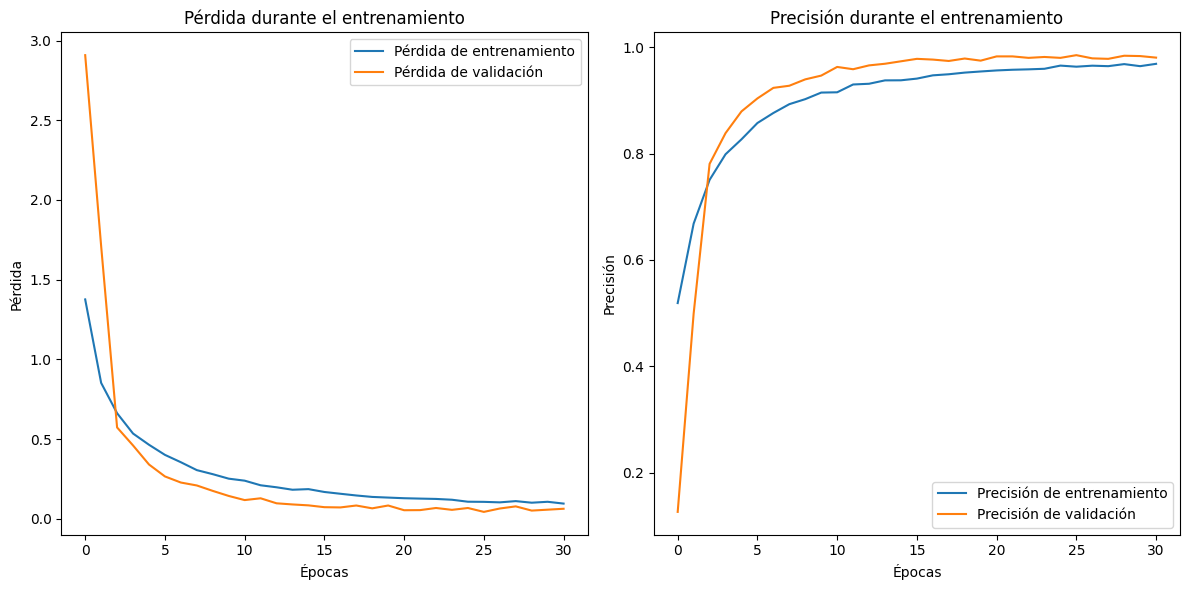

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

# Definir el modelo mejorado
model_improved = models.Sequential()

# Capa convolucional 1 con Batch Normalization y Dropout
model_improved.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(26, 26, 3)))
model_improved.add(layers.BatchNormalization())  # Batch Normalization
model_improved.add(layers.MaxPooling2D((2, 2)))
model_improved.add(layers.Dropout(0.3))  # Dropout para evitar overfitting

# Capa convolucional 2
model_improved.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_improved.add(layers.BatchNormalization())  # Batch Normalization
model_improved.add(layers.MaxPooling2D((2, 2)))
model_improved.add(layers.Dropout(0.3))  # Dropout para evitar overfitting

# Capa convolucional 3
model_improved.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_improved.add(layers.BatchNormalization())  # Batch Normalization
model_improved.add(layers.MaxPooling2D((2, 2)))
model_improved.add(layers.Dropout(0.4))  # Dropout para evitar overfitting

# Aplanar y pasar por capas densas
model_improved.add(layers.Flatten())
model_improved.add(layers.Dense(128, activation='relu'))
model_improved.add(layers.Dropout(0.5))  # Dropout en la capa densa

# Capa de salida para clasificación multi-clase (9 clases)
model_improved.add(layers.Dense(9, activation='softmax'))

# Compilación del modelo
model_improved.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Resumen del modelo para verificar las capas
model_improved.summary()

# Definir EarlyStopping para evitar overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo mejorado
history_improved = model_improved.fit(x_train, y_train, epochs=50, batch_size=64,
                                      validation_data=(x_test, y_test),
                                      callbacks=[early_stopping])

# Graficar las métricas de entrenamiento y validación
import matplotlib.pyplot as plt

# Graficar la pérdida de entrenamiento y validación
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_improved.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_improved.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Graficar la precisión de entrenamiento y validación
plt.subplot(1, 2, 2)
plt.plot(history_improved.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history_improved.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()

204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


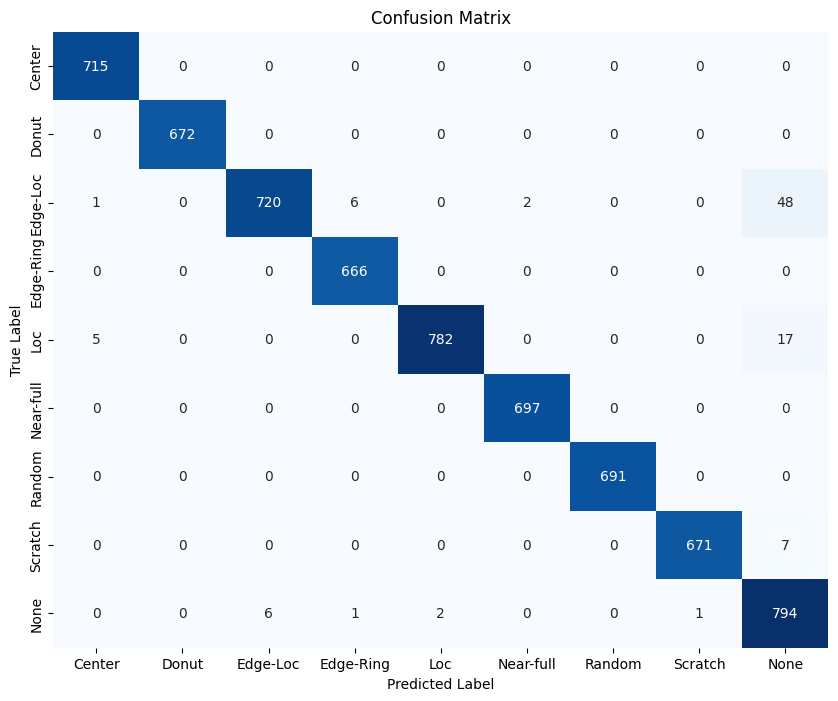

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# --- Realizar predicciones ---
y_pred = np.argmax(model_improved.predict(x_test), axis=1)  # Convertir a etiquetas de clase
y_test_labels = np.argmax(y_test, axis=1)  # Convertir y_test de one-hot encoding a etiquetas

# --- Generar la matriz de confusión ---
cm = confusion_matrix(y_test_labels, y_pred)

# --- Visualización de la matriz de confusión ---
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Center', 'Donut', 'Edge-Loc', 'Edge-Ring', 'Loc', 'Near-full', 'Random', 'Scratch', 'None'],
            yticklabels=['Center', 'Donut', 'Edge-Loc', 'Edge-Ring', 'Loc', 'Near-full', 'Random', 'Scratch', 'None'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Guardar los modelos en formato HDF5
model_improved.save('model_improved.h5')
model.save('model.h5')

In [ ]:
import os

# Verificar si los modelos se guardaron correctamente
print(os.listdir())


['.config', 'model.h5', 'LSWMD.pkl', 'model_improved.h5', 'models_backup.zip', 'sample_data']


In [ ]:
model_improved.save('/content/model_improved.keras')
model.save('/content/model.keras')
#guardarlos

In [ ]:
import shutil

# Comprimir todos los archivos necesarios
shutil.make_archive('/content/models_backup', 'zip', '/content', 'model_improved.keras')
shutil.make_archive('/content/models_backup', 'zip', '/content', 'model.keras')


'/content/models_backup.zip'

In [ ]:
from google.colab import files

# Descargar el archivo comprimido
files.download('/content/models_backup.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#COMO USAR EL ZIP?
from google.colab import files

# Selecciona el archivo ZIP manualmente desde tu computadora
uploaded = files.upload()

#LUEGO,DESCOMPRIMIR EL ARCHIVO
import zipfile

# Extraer todo el contenido en la carpeta actual
with zipfile.ZipFile('models_backup.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')  # Extrae los archivos en /content

# Verificar que se extrajeron los archivos
import os
print(os.listdir('/content'))




#CARGAR LOS MODELOS GUARDADOS
from tensorflow.keras.models import load_model

# Cargar los modelos desde los archivos extraídos
model_improved = load_model('/content/model_improved.keras')
model = load_model('/content/model.keras')

# Verificar la estructura de uno de los modelos
model_improved.summary()


#PARA USARLOS CON PREDICCION
import numpy as np

# Supongamos que tienes datos de prueba en x_test
predictions = model_improved.predict(np.expand_dims(x_test[0], axis=0))

print("Predicción:", predictions)


In [ ]:
import shutil

# Comprimir el modelo mejorado en un archivo ZIP
shutil.make_archive('model_improved_backup', 'zip', '.', 'model_improved.keras')

# Comprimir el segundo modelo en un archivo ZIP
shutil.make_archive('model_backup', 'zip', '.', 'model.keras')


'/content/model_backup.zip'

In [ ]:
import zipfile

# Verificar el contenido del primer archivo .zip
with zipfile.ZipFile('model_improved_backup.zip', 'r') as zipf:
    print("Contenido de model_improved_backup.zip:")
    print(zipf.namelist())

# Verificar el contenido del segundo archivo .zip
with zipfile.ZipFile('model_backup.zip', 'r') as zipf:
    print("Contenido de model_backup.zip:")
    print(zipf.namelist())


Contenido de model_improved_backup.zip:
['model_improved.keras']
Contenido de model_backup.zip:
['model.keras']


In [ ]:
from google.colab import files

# Descargar el archivo .zip del modelo mejorado
files.download('model_improved_backup.zip')

# Descargar el archivo .zip del segundo modelo
files.download('model_backup.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt

# Seleccionar una imagen de los datos originales
index = 3  # Puedes cambiar este índice según tu preferencia
original_image = new_x[index]

# Mostrar la imagen original
plt.figure(figsize=(6,6))
plt.imshow(original_image)  # new_x ya debería estar en formato (26,26,3)
plt.title("Imagen Original")
plt.axis("off")
plt.show()


NameError: name 'new_x' is not defined